High-Latitude Magnetic Rossby Waves

Calculation of a magnetic Rossby waves with angular order m = 1. This particular choice allows fluid flow and a magnetic perturbation at the poles. Only the northern hemisphere is included in the calculations. Layer properties are chosen to give a period of roughly 20 years. The solution is saved as a Matlab file. 

In [1]:
using LinearAlgebra
using NonlinearEigenproblems
using Interpolations
using Plots
using MAT
include("ProjectFiles.jl");


In [2]:
# define model parameters
H = 132.5;    # thickness of layer (km)
Np = 1.1;    # dimensionless stratification Np = N/Omega
m = 1;        # angular order
Br = 0.6;     # radial magnetic field (mT)

In [3]:
# number of grid points in latitude (equator to pole)
ngrid = 160;

A total of 320 modes are recovered when ngrid=160. Select an initial estimate of the period to identify the wave of interest.  

In [4]:
# initial period
T = -20.0;     # years

In [5]:
pd,q,bx,by,y = pWaves(ngrid,H,Np,Br,m,T);
println("Period = ",pd," (years)    Quality factor Q = ",q);

mode number = 12
Period = -20.411600723304012 (years)    Quality factor Q = 69.39529339709419


Convert the meridional grid to latitude (in degree) and plot the real part of the eigenfunction $b_y$

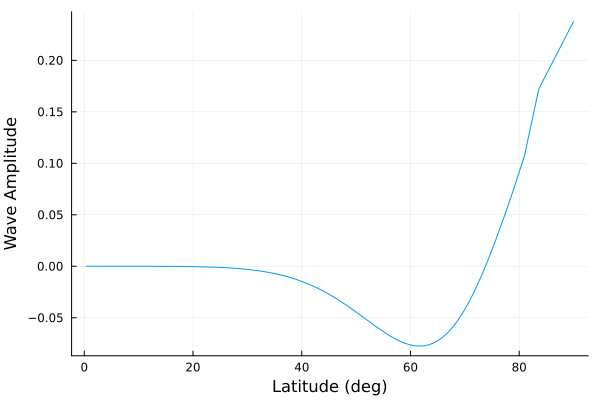

In [6]:
lat = asin.(y)*180.0/pi;
amp = maximum(abs.(real(by)));
plot(lat,real(bx)/amp,xlabel="Latitude (deg)",ylabel="Wave Amplitude",legend=nothing)

Compute horizontal components velocity $(v_{\theta},v_{\phi})$ and acceleration $(a_{\theta}, a_{\phi})$ from the eigenfunctions by and bx

In [7]:
ntheta = 100
t,colat,lg,vph,vth,aph,ath = realization(ntheta,H,Br,m,y,bx,by,pd,q);

Compute the horizontal divergence of velocity and acceleration

Velocity Field

$\nabla \cdot {\bf v}_H = \frac{1}{r \sin\theta}\, \partial_{\theta} (\sin\theta v_{\theta})  + \frac{1}{r\sin\theta} \partial_\phi v_{\phi}$

Acceleration

$\nabla \cdot {\bf a}_H = \frac{1}{r \sin\theta}\, \partial_{\theta} (\sin\theta a_{\theta})  + \frac{1}{r\sin\theta} \partial_\phi a_{\phi}$

In [8]:
vdiv, adiv = divergence(t,colat,lg,vph,vth,aph,ath);

Save a matlab file

In [9]:
t = t .+ 1990.0;

In [10]:
file = matopen("MagRossby_M1.mat","w");
write(file,"t",t)
write(file,"colat",colat)
write(file,"lg",lg)
write(file,"vph",vph)
write(file,"vth",vth)
write(file,"aph",aph)
write(file,"ath",ath)
write(file,"vdiv",vdiv)
write(file,"adiv",adiv)
close(file)

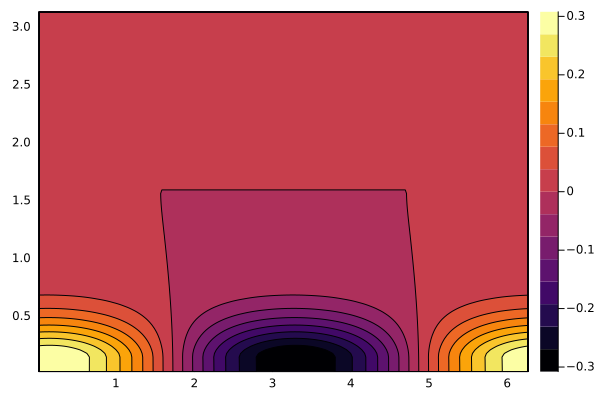

In [11]:
contourf(lg,colat,ath[1,:,:])

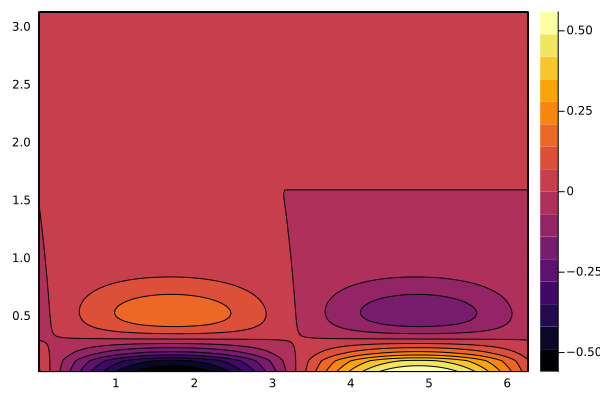

In [12]:
contourf(lg,colat,aph[1,:,:])

In [13]:
[length(colat),length(lg),length(t)]

3-element Vector{Int64}:
 100
 200
  41